<a href="https://colab.research.google.com/github/Alex-Hoang666/AI/blob/main/AI_W10_8_4_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

class_name = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]


169001437/169001437 [==============================] - 2s 0us/step


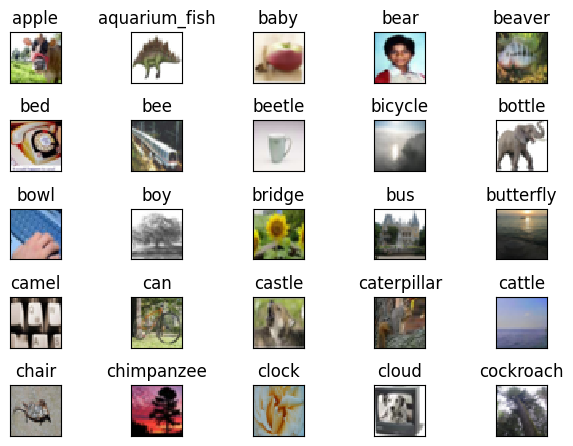

In [2]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation='none')
  plt.title("{}".format(class_name[i]))
  plt.xticks([])
  plt.yticks([])

In [3]:
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255

In [4]:
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Dense(500, activation = 'relu', input_shape = (32, 32, 3)))
model.add(Dense(300, activation ='relu'))
model.add(Dense(100, activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 500)       2000      
                                                                 
 dense_1 (Dense)             (None, 32, 32, 300)       150300    
                                                                 
 dense_2 (Dense)             (None, 32, 32, 100)       30100     
                                                                 
Total params: 182,400
Trainable params: 182,400
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test, 100)

In [ ]:
from keras.metrics import accuracy

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 30)